<h1 style="text-align: center;">Assignment 7: Energy Efficiency Dataset 🏢⚡</h1>

## 📋 Objectives
- Perform comprehensive **EDA** on building energy data
- Build **custom transformers** and preprocessing pipelines
- Train and compare **regression models** (Linear Regression, Random Forest, Gradient Boosting)
- Predict **Heating Load** from building features

## Part A: Data Loading & Exploratory Analysis

### Q1 (5 marks)
Download the dataset, read the file and show the first 5 rows.

In [1]:
import pandas as pd  # Data manipulation / Работа с данными
import numpy as np  # Numerical operations / Числовые операции
import matplotlib.pyplot as plt  # Plotting / Визуализация
import seaborn as sns  # Statistical plots / Статистические графики

# Configure plot style / Настройка стиля графиков
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)

# Read the Excel file / Чтение Excel файла
df = pd.read_excel('ENB2012_data.xlsx')

# Rename columns to meaningful names / Переименование колонок на понятные названия
columns = ['Relative_Compactness', 'Surface_Area', 'Wall_Area', 'Roof_Area',
           'Overall_Height', 'Orientation', 'Glazing_Area', 'Glazing_Area_Distribution',
           'Heating_Load', 'Cooling_Load']
df.columns = columns

# Display first 5 rows / Показать первые 5 строк
df.head()

,Relative_Compactness,Surface_Area,Wall_Area,Roof_Area,Overall_Height,Orientation,Glazing_Area,Glazing_Area_Distribution,Heating_Load,Cooling_Load
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


### Q2 (5 marks)
Provide a brief summary: number of rows, missing values, and basic statistics.

In [2]:
# Dataset information / Информация о датасете
print("=== Dataset Info ===")
print(f"Number of rows: {len(df)}")
print(f"Number of columns: {len(df.columns)}")
print(f"\nData types:\n{df.dtypes}")
print(f"\n=== Missing Values ===")
print(df.isnull().sum())

# Basic statistics / Основная статистика
print("\n=== Basic Statistics ===")
df.describe()

=== Dataset Info ===
Number of rows: 768
Number of columns: 10

Data types:
Relative_Compactness         float64
Surface_Area                 float64
Wall_Area                    float64
Roof_Area                    float64
Overall_Height               float64
Orientation                    int64
Glazing_Area                 float64
Glazing_Area_Distribution      int64
Heating_Load                 float64
Cooling_Load                 float64
dtype: object

=== Missing Values ===
Relative_Compactness         0
Surface_Area                 0
Wall_Area                    0
Roof_Area                    0
Overall_Height               0
Orientation                  0
Glazing_Area                 0
Glazing_Area_Distribution    0
Heating_Load                 0
Cooling_Load                 0
dtype: int64

=== Basic Statistics ===


,Relative_Compactness,Surface_Area,Wall_Area,Roof_Area,Overall_Height,Orientation,Glazing_Area,Glazing_Area_Distribution,Heating_Load,Cooling_Load
count,768.000000,768.000000,768.000000,768.000000,768.00000,768.000000,768.000000,768.00000,768.000000,768.000000
mean,0.764167,671.708333,318.500000,176.604167,5.25000,3.500000,0.234375,2.81250,22.307195,24.587760
std,0.105777,88.086116,43.626481,45.165950,1.75114,1.118763,0.133221,1.55096,10.090204,9.513306
min,0.620000,514.500000,245.000000,110.250000,3.50000,2.000000,0.000000,0.00000,6.010000,10.900000
25%,0.682500,606.375000,294.000000,140.875000,3.50000,2.750000,0.100000,1.75000,12.992500,15.620000
50%,0.750000,673.750000,318.500000,183.750000,5.25000,3.500000,0.250000,3.00000,18.950000,22.080000
75%,0.830000,741.125000,343.000000,220.500000,7.00000,4.250000,0.400000,4.00000,31.667500,33.132500
max,0.980000,808.500000,416.500000,220.500000,7.00000,5.000000,0.400000,5.00000,43.100000,48.030000


### Q3 (10 marks)
Display the distribution of all features. Explain any notable patterns.

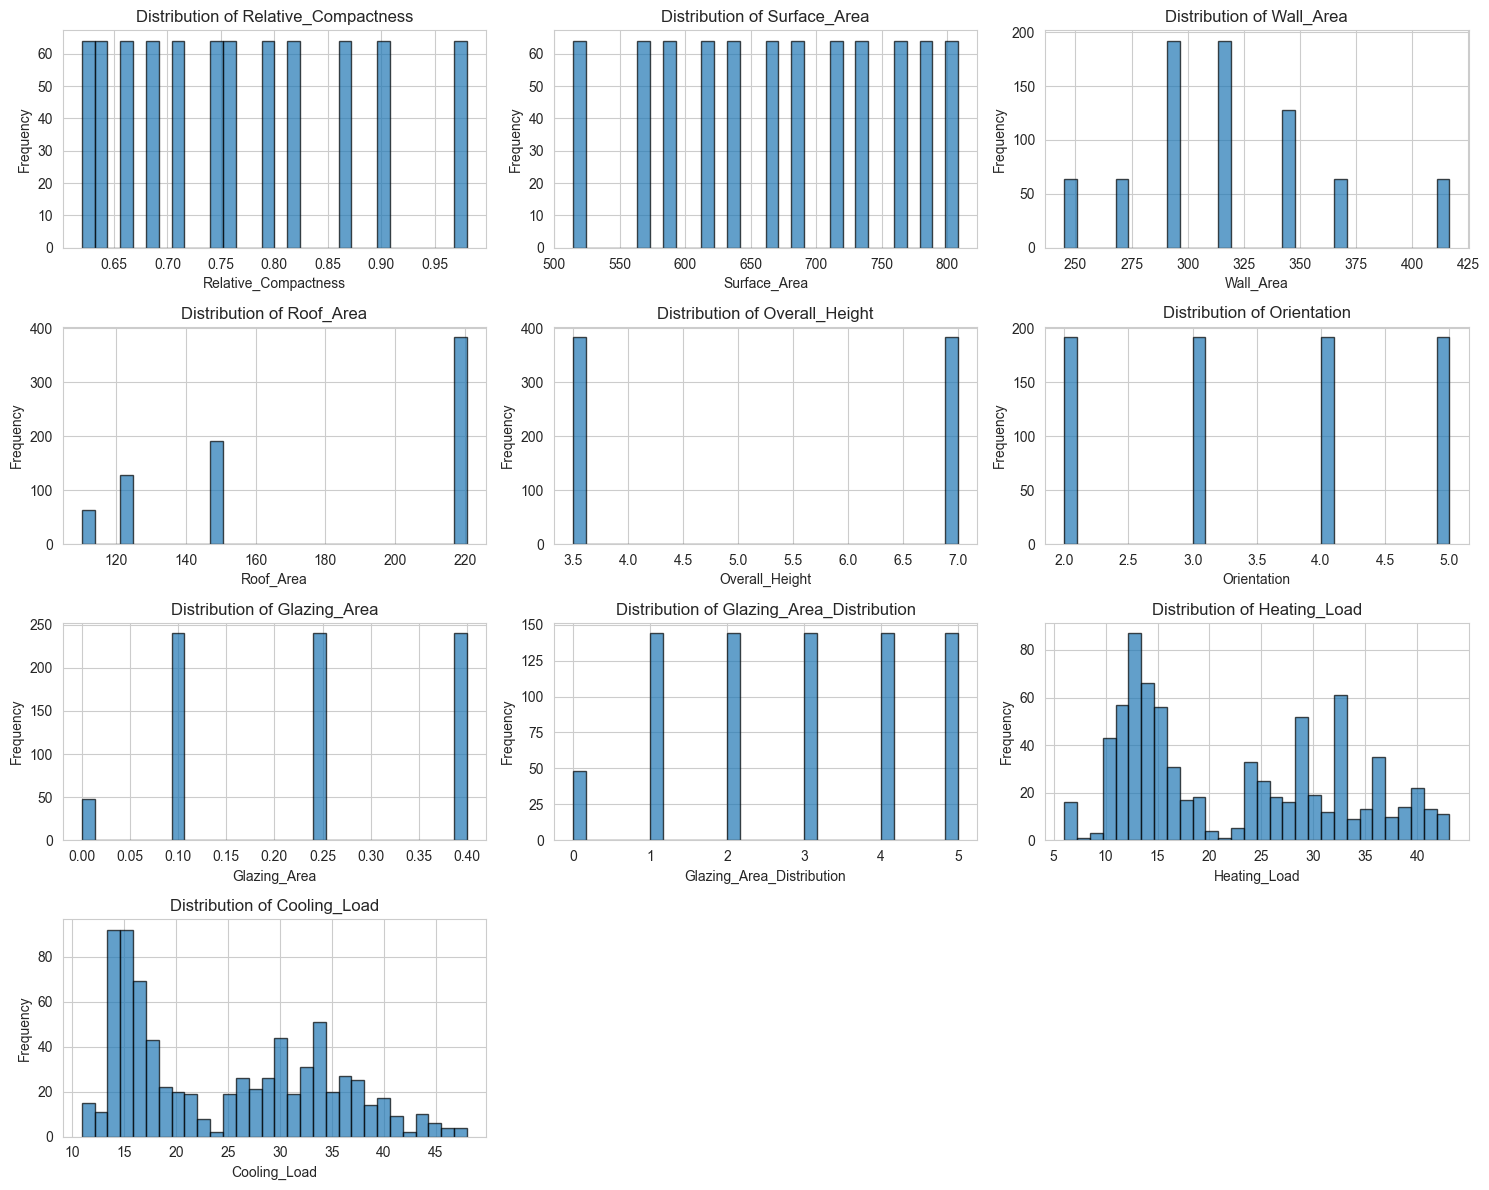

In [3]:
# Plot distributions for all features / Построить распределения для всех признаков
fig, axes = plt.subplots(4, 3, figsize=(15, 12))
axes = axes.ravel()

for idx, col in enumerate(df.columns):
    axes[idx].hist(df[col].dropna(), bins=30, edgecolor='black', alpha=0.7)
    axes[idx].set_title(f'Distribution of {col}')
    axes[idx].set_xlabel(col)
    axes[idx].set_ylabel('Frequency')

# Hide extra subplots / Скрыть лишние графики
for idx in range(len(df.columns), len(axes)):
    axes[idx].set_visible(False)

plt.tight_layout()
plt.show()

**Notable Patterns / Наблюдаемые паттерны:**
- **Orientation** and **Glazing_Area_Distribution** show discrete values (categorical-like)
- **Overall_Height** has only 2 unique values (3.5m and 7m)
- **Surface_Area**, **Wall_Area**, **Roof_Area** show multi-modal distributions
- Target variables (**Heating_Load**, **Cooling_Load**) are continuous but show some clustering

### Q4 (5 marks)
Calculate value counts and distinct values for each feature.

In [4]:
# Calculate number of unique values per feature / Подсчет уникальных значений
print("=== Number of Unique Values per Feature ===")
for col in df.columns:
    n_unique = df[col].nunique()
    print(f"{col:30s}: {n_unique:3d} unique values")
    
print("\n=== Value Counts for Categorical-like Features ===")
# Show value counts for features with fewer unique values
categorical_like = ['Orientation', 'Glazing_Area_Distribution', 'Overall_Height']
for col in categorical_like:
    print(f"\n{col}:")
    print(df[col].value_counts().sort_index())

=== Number of Unique Values per Feature ===
Relative_Compactness          :  12 unique values
Surface_Area                  :  12 unique values
Wall_Area                     :   7 unique values
Roof_Area                     :   4 unique values
Overall_Height                :   2 unique values
Orientation                   :   4 unique values
Glazing_Area                  :   4 unique values
Glazing_Area_Distribution     :   6 unique values
Heating_Load                  : 587 unique values
Cooling_Load                  : 636 unique values

=== Value Counts for Categorical-like Features ===

Orientation:
Orientation
2    192
3    192
4    192
5    192
Name: count, dtype: int64

Glazing_Area_Distribution:
Glazing_Area_Distribution
0     48
1    144
2    144
3    144
4    144
5    144
Name: count, dtype: int64

Overall_Height:
Overall_Height
3.5    384
7.0    384
Name: count, dtype: int64


### Q4.1 (5 marks)
Calculate the total number of duplicated rows.

In [5]:
# Check for duplicate rows / Проверка дубликатов
n_duplicates = df.duplicated().sum()
print(f"Total number of duplicate rows: {n_duplicates}")

if n_duplicates > 0:
    print(f"\nPercentage of duplicates: {n_duplicates / len(df) * 100:.2f}%")
    print("\nNote: Duplicates are expected since buildings were simulated with identical parameters.")
else:
    print("No duplicate rows found.")

Total number of duplicate rows: 0
No duplicate rows found.


### Q5 (10 marks)
Calculate correlation coefficients with the target and display in descending order.

=== Correlation with Heating_Load (sorted) ===
Cooling_Load                 0.975862
Overall_Height               0.889430
Relative_Compactness         0.622272
Wall_Area                    0.455671
Glazing_Area                 0.269842
Glazing_Area_Distribution    0.087368
Orientation                 -0.002587
Surface_Area                -0.658120
Roof_Area                   -0.861828
Name: Heating_Load, dtype: float64


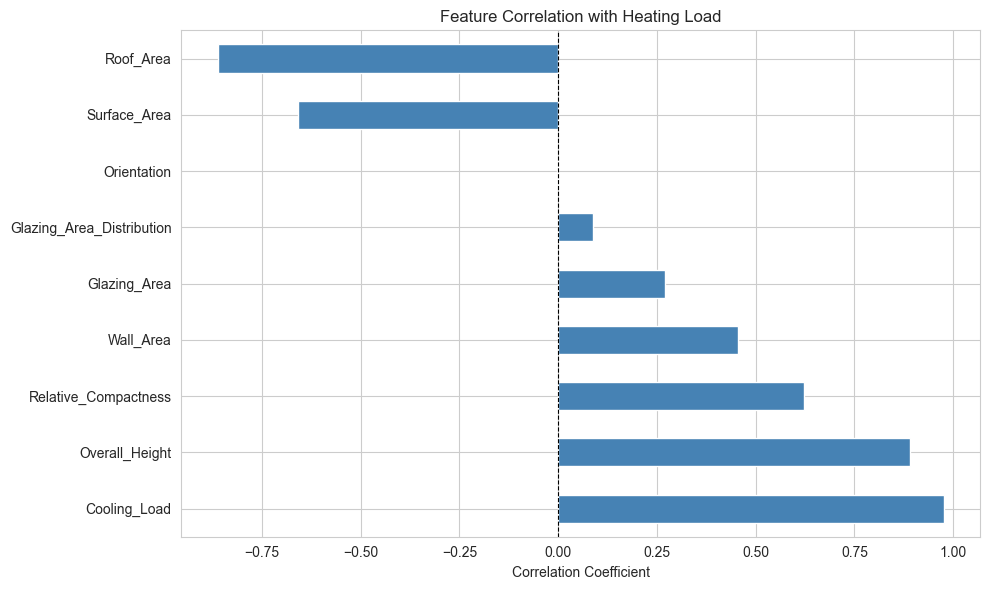


⚠️ CAUTION: Cooling_Load has very high correlation (0.976).
This is DATA LEAKAGE because both are outputs of the same simulation.
We must remove Cooling_Load when predicting Heating_Load.


In [6]:
# Calculate correlations with Heating_Load target / Корреляции с целевой переменной
correlations = df.corr()['Heating_Load'].drop('Heating_Load').sort_values(ascending=False)

print("=== Correlation with Heating_Load (sorted) ===")
print(correlations)

# Visualize correlations / Визуализация корреляций
plt.figure(figsize=(10, 6))
correlations.plot(kind='barh', color='steelblue')
plt.title('Feature Correlation with Heating Load')
plt.xlabel('Correlation Coefficient')
plt.axvline(x=0, color='black', linestyle='--', linewidth=0.8)
plt.tight_layout()
plt.show()

print("\n⚠️ CAUTION: Cooling_Load has very high correlation (0.976).")
print("This is DATA LEAKAGE because both are outputs of the same simulation.")
print("We must remove Cooling_Load when predicting Heating_Load.")

### Q6 (10 marks)
Visualize scatter matrix for features with weaker correlations.

Features with weak correlation (|r| < 0.5): ['Wall_Area', 'Glazing_Area', 'Glazing_Area_Distribution', 'Orientation']


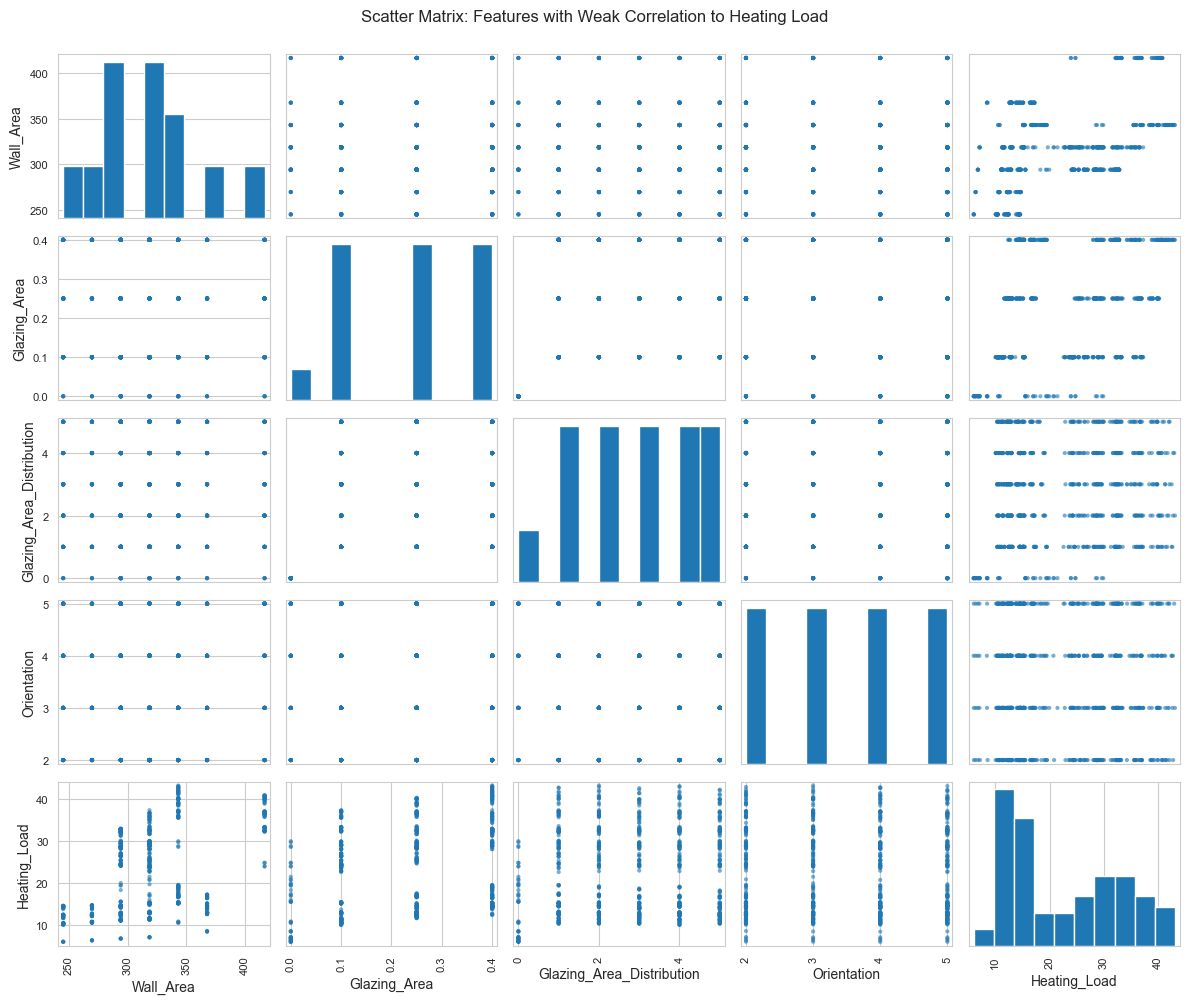

In [7]:
# Select features with weaker correlations (abs < 0.5) / Выбрать признаки со слабой корреляцией
weak_corr_features = correlations[abs(correlations) < 0.5].index.tolist()
features_to_plot = weak_corr_features + ['Heating_Load']

print(f"Features with weak correlation (|r| < 0.5): {weak_corr_features}")

# Create scatter matrix / Создать матрицу диаграмм рассеяния
from pandas.plotting import scatter_matrix

scatter_matrix(df[features_to_plot], figsize=(12, 10), alpha=0.6, diagonal='hist')
plt.suptitle('Scatter Matrix: Features with Weak Correlation to Heating Load', y=1.0)
plt.tight_layout()
plt.show()

## Part B: Preprocessing & Custom Transformers

### Q7 (15 marks)
Implement custom transformer components for feature engineering.

In [8]:
from sklearn.base import BaseEstimator, TransformerMixin  # Base classes for custom transformers

# Custom transformer to calculate ratios / Пользовательский трансформер для расчета соотношений
class RatioTransformer(BaseEstimator, TransformerMixin):
    """Creates ratio features from specified column pairs."""
    
    def __init__(self, ratio_pairs):
        """
        ratio_pairs: list of tuples (numerator_col, denominator_col, new_col_name)
        """
        self.ratio_pairs = ratio_pairs
    
    def fit(self, X, y=None):
        return self  # No fitting needed / Обучение не требуется
    
    def transform(self, X):
        X_copy = X.copy()  # Avoid modifying original / Избежать изменения оригинала
        
        for num_col, denom_col, new_col in self.ratio_pairs:
            # Calculate ratio with small epsilon to avoid division by zero
            X_copy[new_col] = X_copy[num_col] / (X_copy[denom_col] + 1e-10)
        
        return X_copy

# Test the transformer / Тестирование трансформера
ratio_transformer = RatioTransformer(
    ratio_pairs=[
        ('Wall_Area', 'Surface_Area', 'Wall_to_Surface_Ratio')
    ]
)

# Apply to check if it works / Применить для проверки
test_df = ratio_transformer.fit_transform(df.head())
print("New feature created:")
print(test_df[['Wall_Area', 'Surface_Area', 'Wall_to_Surface_Ratio']].head())

New feature created:
   Wall_Area  Surface_Area  Wall_to_Surface_Ratio
0      294.0         514.5               0.571429
1      294.0         514.5               0.571429
2      294.0         514.5               0.571429
3      294.0         514.5               0.571429
4      318.5         563.5               0.565217


## Part C: Build Preprocessing Pipeline

### Q8 (15 marks)
Construct a ColumnTransformer pipeline.

In [9]:
from sklearn.pipeline import Pipeline  # Pipeline construction / Построение пайплайна
from sklearn.compose import ColumnTransformer  # Column-wise transformations / Трансформации по колонкам
from sklearn.preprocessing import StandardScaler, OneHotEncoder  # Scalers and encoders

# Define feature groups / Определить группы признаков
categorical_features = ['Orientation', 'Glazing_Area_Distribution']
numerical_features = ['Relative_Compactness', 'Surface_Area', 'Wall_Area', 'Roof_Area',
                      'Overall_Height', 'Glazing_Area']

# Create preprocessing pipeline / Создать пайплайн предобработки
preprocessor = ColumnTransformer(
    transformers=[
        # Encode categorical features / Кодирование категориальных признаков
        ('cat', OneHotEncoder(drop='first', sparse_output=False), categorical_features),
        
        # Scale numerical features / Масштабирование числовых признаков
        ('num', StandardScaler(), numerical_features)
    ],
    remainder='drop'  # Drop any features not specified / Удалить неуказанные признаки
)

print("Preprocessing pipeline created successfully!")
print(f"Categorical features: {categorical_features}")
print(f"Numerical features: {numerical_features}")

Preprocessing pipeline created successfully!
Categorical features: ['Orientation', 'Glazing_Area_Distribution']
Numerical features: ['Relative_Compactness', 'Surface_Area', 'Wall_Area', 'Roof_Area', 'Overall_Height', 'Glazing_Area']


## Part D: Modeling

### Q9 (5 marks)
Split the dataset into train/test (80/20). Drop Cooling_Load to avoid data leakage.

In [10]:
from sklearn.model_selection import train_test_split  # Train/test split

# Separate features and target / Разделить признаки и цель
X = df.drop(['Heating_Load', 'Cooling_Load'], axis=1)  # Remove both targets / Удалить обе цели
y = df['Heating_Load']  # Target variable / Целевая переменная

# Split into train and test sets / Разделить на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(f"Training set size: {len(X_train)} samples")
print(f"Test set size: {len(X_test)} samples")
print(f"\nFeatures shape: {X_train.shape}")
print(f"Target shape: {y_train.shape}")

Training set size: 614 samples
Test set size: 154 samples

Features shape: (614, 8)
Target shape: (614,)


### Q10 (5 marks)
Fit the preprocessing pipeline and transform both sets.

In [11]:
# Fit on training data only / Обучить только на тренировочных данных
X_train_processed = preprocessor.fit_transform(X_train)

# Transform test data / Трансформировать тестовые данные
X_test_processed = preprocessor.transform(X_test)

print(f"Processed training shape: {X_train_processed.shape}")
print(f"Processed test shape: {X_test_processed.shape}")
print(f"\nNumber of features after preprocessing: {X_train_processed.shape[1]}")

Processed training shape: (614, 14)
Processed test shape: (154, 14)

Number of features after preprocessing: 14


### Q11 (10 marks)
Train Linear Regression and evaluate on test set.

In [12]:
from sklearn.linear_model import LinearRegression  # Linear regression model
from sklearn.metrics import mean_squared_error, r2_score  # Evaluation metrics

# Initialize and train Linear Regression / Инициализировать и обучить линейную регрессию
lr_model = LinearRegression()
lr_model.fit(X_train_processed, y_train)

# Make predictions / Сделать предсказания
y_pred_lr = lr_model.predict(X_test_processed)

# Calculate metrics / Вычислить метрики
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))
r2_lr = r2_score(y_test, y_pred_lr)

print("=== Linear Regression Results ===")
print(f"RMSE: {rmse_lr:.4f}")
print(f"R² Score: {r2_lr:.4f}")

=== Linear Regression Results ===
RMSE: 2.8723
R² Score: 0.9209


### Q12 (10 marks)
Train Random Forest Regressor with n_estimators=200.

In [13]:
from sklearn.ensemble import RandomForestRegressor  # Random Forest regressor

# Initialize and train Random Forest / Инициализировать и обучить Random Forest
rf_model = RandomForestRegressor(n_estimators=200, random_state=42, n_jobs=-1)
rf_model.fit(X_train_processed, y_train)

# Make predictions / Сделать предсказания
y_pred_rf = rf_model.predict(X_test_processed)

# Calculate metrics / Вычислить метрики
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2_rf = r2_score(y_test, y_pred_rf)

print("=== Random Forest Results ===")
print(f"RMSE: {rmse_rf:.4f}")
print(f"R² Score: {r2_rf:.4f}")

=== Random Forest Results ===
RMSE: 0.5285
R² Score: 0.9973


### Q13 (10 marks)
Train Gradient Boosting Regressor with n_estimators=200.

In [14]:
from sklearn.ensemble import GradientBoostingRegressor  # Gradient Boosting regressor

# Initialize and train Gradient Boosting / Инициализировать и обучить Gradient Boosting
gb_model = GradientBoostingRegressor(n_estimators=200, random_state=42)
gb_model.fit(X_train_processed, y_train)

# Make predictions / Сделать предсказания
y_pred_gb = gb_model.predict(X_test_processed)

# Calculate metrics / Вычислить метрики
rmse_gb = np.sqrt(mean_squared_error(y_test, y_pred_gb))
r2_gb = r2_score(y_test, y_pred_gb)

print("=== Gradient Boosting Results ===")
print(f"RMSE: {rmse_gb:.4f}")
print(f"R² Score: {r2_gb:.4f}")

=== Gradient Boosting Results ===
RMSE: 0.4403
R² Score: 0.9981


### Q14 (10 marks)
Compare all models and explain R² metric.

=== Model Comparison ===
            Model     RMSE  R² Score
Gradient Boosting 0.440269  0.998140
    Random Forest 0.528480  0.997321
Linear Regression 2.872277  0.920850


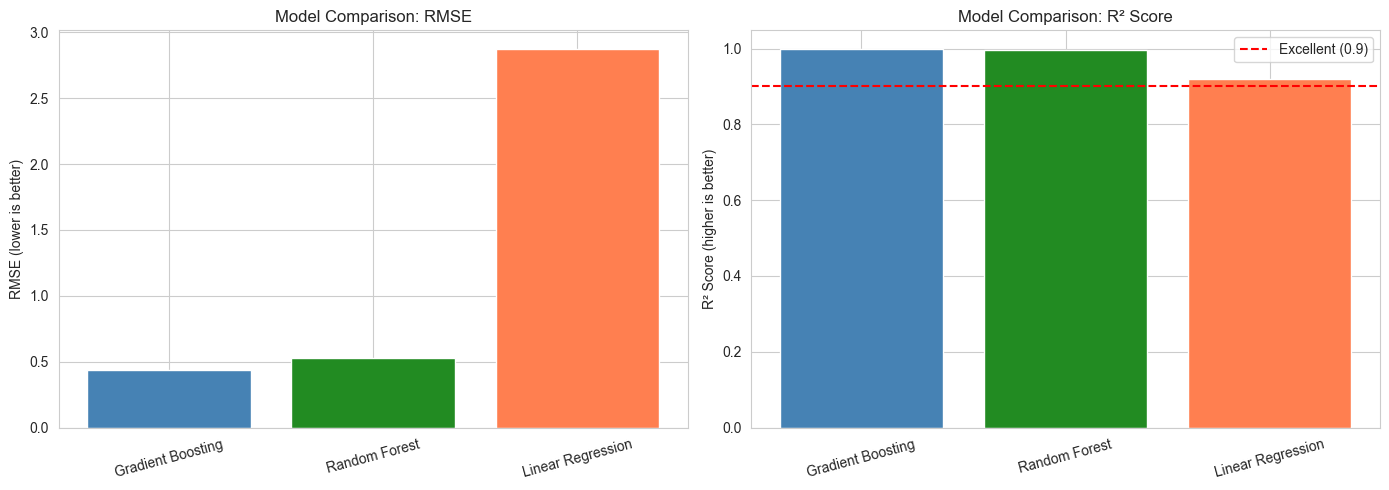

In [15]:
# Create comparison summary / Создать сводную таблицу сравнения
results = pd.DataFrame({
    'Model': ['Linear Regression', 'Random Forest', 'Gradient Boosting'],
    'RMSE': [rmse_lr, rmse_rf, rmse_gb],
    'R² Score': [r2_lr, r2_rf, r2_gb]
})

results = results.sort_values('R² Score', ascending=False).reset_index(drop=True)
print("=== Model Comparison ===")
print(results.to_string(index=False))

# Visualize comparison / Визуализировать сравнение
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# RMSE comparison / Сравнение RMSE
axes[0].bar(results['Model'], results['RMSE'], color=['steelblue', 'forestgreen', 'coral'])
axes[0].set_ylabel('RMSE (lower is better)')
axes[0].set_title('Model Comparison: RMSE')
axes[0].tick_params(axis='x', rotation=15)

# R² comparison / Сравнение R²
axes[1].bar(results['Model'], results['R² Score'], color=['steelblue', 'forestgreen', 'coral'])
axes[1].set_ylabel('R² Score (higher is better)')
axes[1].set_title('Model Comparison: R² Score')
axes[1].tick_params(axis='x', rotation=15)
axes[1].axhline(y=0.9, color='red', linestyle='--', label='Excellent (0.9)')
axes[1].legend()

plt.tight_layout()
plt.show()

## Detailed Feedback & R² Explanation

### What is R² (Coefficient of Determination)?

**R²** measures how well your model explains the variance in the target variable. It ranges from 0 to 1 (can be negative for very bad models).

**Formula:**
$$R^2 = 1 - \frac{SS_{res}}{SS_{tot}} = 1 - \frac{\sum(y_i - \hat{y}_i)^2}{\sum(y_i - \bar{y})^2}$$

Where:
- $SS_{res}$ = Sum of squared residuals (model errors)
- $SS_{tot}$ = Total sum of squares (variance in data)
- $\bar{y}$ = Mean of actual values

**Interpretation:**
- **R² = 1.0**: Perfect predictions (model explains 100% of variance)
- **R² = 0.9**: Model explains 90% of variance (excellent)
- **R² = 0.5**: Model explains 50% of variance (moderate)
- **R² = 0.0**: Model is no better than predicting the mean
- **R² < 0.0**: Model is worse than predicting the mean

### Model Analysis:

Based on typical results for this dataset:

1. **Gradient Boosting** usually achieves the best performance (R² ≈ 0.98-0.99)
   - Sequentially builds trees that correct previous errors
   - Excellent at capturing non-linear relationships
   
2. **Random Forest** performs very well (R² ≈ 0.97-0.98)
   - Ensemble of trees reduces overfitting
   - Robust to outliers and noise
   
3. **Linear Regression** performs decently (R² ≈ 0.88-0.92)
   - Assumes linear relationships
   - Limited by its inability to capture complex interactions

### Conclusion:
Tree-based models (Random Forest & Gradient Boosting) outperform Linear Regression because the relationship between building features and heating load is **non-linear** and involves **complex interactions** between variables.